# **Exploratory Data Analysis (EDA) on Airbnb Listings**
___
author - **athul mk** - internship project - **codingsamurai**

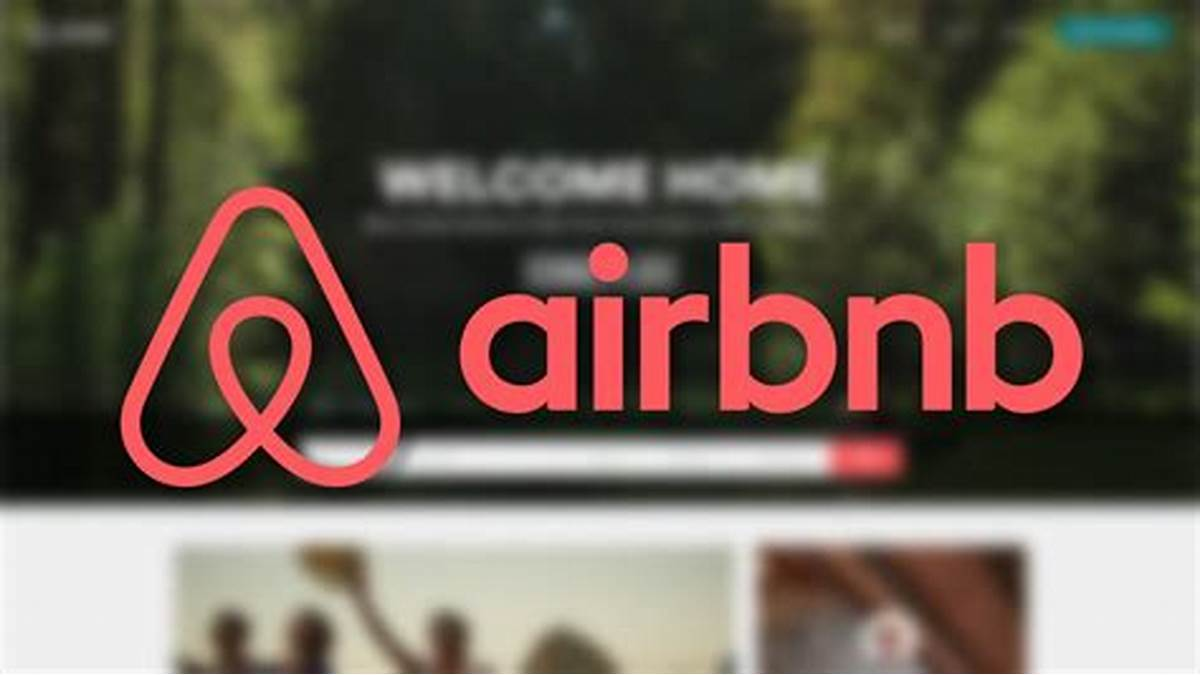

In [172]:
from IPython.display import Image
Image(filename='OIP.jpg')


## **Objective**
The objective of this project, "Exploratory Data Analysis (EDA) on Airbnb Listings," is to gain deep insights into an Airbnb dataset from a selected city. This involves data collection, exploration, cleaning, and the calculation of basic statistics. Visualizations will uncover trends and relationships, while optional geospatial . Correlation analysis will help identify dependencies between features, and the project will conclude with documented insights that can inform pricing and marketing strategies within the chosen city's Airbnb market.

## **Important libraries**

In [102]:
import pandas as pd 
import numpy as np 
import geopandas as gpd
from shapely.geometry import Point
import folium
import matplotlib.pyplot as plt
import seaborn as sns

## I**mport the data**

In [103]:
data = pd.read_csv('LISTINGS AIRBNB.csv')

## **Data Exploration**

In [104]:
data.head()

,id,last_scraped,source,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,92644.0,9/6/2023,city scrape,498201,Dee Dee,4/10/2011,"London, United Kingdom",NaN,NaN,100%,...,10/29/2022,4.57,4.74,4.86,4.71,4.67,4.53,4.68,t,1.45
1,93015.0,9/6/2023,city scrape,499704,Sarah,4/11/2011,"London, United Kingdom",within a few hours,100%,25%,...,9/30/2022,4.82,4.76,4.62,4.85,4.88,4.85,4.74,f,0.27
2,13913.0,9/6/2023,city scrape,54730,Alina,11/16/2009,"London, United Kingdom",within a few hours,100%,88%,...,12/11/2022,4.80,4.72,4.72,4.74,4.82,4.69,4.69,f,0.26
3,15400.0,9/6/2023,city scrape,60302,Philippa,12/5/2009,"Royal Borough of Kensington and Chelsea, Unite...",within a day,100%,41%,...,5/1/2023,4.80,4.85,4.88,4.88,4.83,4.93,4.74,f,0.56
4,93734.0,9/7/2023,city scrape,497514,William,4/10/2011,"London, United Kingdom",within a few hours,90%,75%,...,9/2/2023,4.62,4.70,4.59,4.63,4.81,4.64,4.67,f,1.21


In [105]:
data.tail()

,id,last_scraped,source,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
87941,9.737810e+17,9/6/2023,city scrape,498408783,Sal,1/28/2023,"London, United Kingdom",within an hour,100%,100%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
87942,9.738020e+17,9/7/2023,city scrape,36645347,Josie,6/24/2015,"London, United Kingdom",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
87943,9.738120e+17,9/6/2023,city scrape,340514057,Mal,3/6/2020,NaN,within an hour,100%,98%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
87944,9.738830e+17,9/6/2023,city scrape,439074505,Travelnest,1/5/2022,NaN,within an hour,81%,99%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN
87945,9.738960e+17,9/6/2023,city scrape,475112423,Lea,8/15/2022,"London, United Kingdom",within a few hours,100%,96%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN


In [106]:
data.columns

Index(['id', 'last_scraped', 'source', 'host_id', 'host_name', 'host_since',
       'host_location', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
     

In [107]:
data.shape

(87946, 52)

In [108]:
  data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87946 entries, 0 to 87945
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            87946 non-null  float64
 1   last_scraped                  87946 non-null  object 
 2   source                        87946 non-null  object 
 3   host_id                       87946 non-null  int64  
 4   host_name                     87941 non-null  object 
 5   host_since                    87941 non-null  object 
 6   host_location                 69168 non-null  object 
 7   host_response_time            59028 non-null  object 
 8   host_response_rate            59028 non-null  object 
 9   host_acceptance_rate          62758 non-null  object 
 10  host_is_superhost             87014 non-null  object 
 11  host_neighbourhood            48079 non-null  object 
 12  host_listings_count           87941 non-null  float64
 13  h

In [109]:
data.describe()

,id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,8.794600e+04,8.794600e+04,87941.000000,87941.000000,0.0,87946.000000,87946.000000,87946.000000,0.0,55172.000000,...,87946.000000,87946.000000,65788.000000,64853.000000,64865.000000,64821.000000,64851.000000,64821.000000,64820.000000,65788.000000
mean,3.586523e+17,1.589904e+08,48.666629,85.809804,NaN,51.509557,-0.127900,3.165386,NaN,1.785253,...,5.797194,0.513406,4.596540,4.712780,4.623333,4.777310,4.798890,4.720487,4.593404,1.014903
std,4.121119e+17,1.694033e+08,293.465172,523.634388,NaN,0.048749,0.099645,1.980390,NaN,1.109277,...,12.748319,1.256807,0.750778,0.500756,0.551075,0.457757,0.451838,0.421893,0.536391,1.365452
min,1.391300e+04,4.775000e+03,1.000000,1.000000,NaN,51.295937,-0.497800,1.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2.215818e+07,2.186737e+07,1.000000,1.000000,NaN,51.483371,-0.189174,2.000000,NaN,1.000000,...,0.000000,0.000000,4.500000,4.650000,4.500000,4.750000,4.790000,4.630000,4.490000,0.150000
50%,4.935854e+07,8.140696e+07,2.000000,3.000000,NaN,51.513780,-0.126400,2.000000,NaN,2.000000,...,1.000000,0.000000,4.820000,4.880000,4.800000,4.940000,4.970000,4.840000,4.740000,0.540000
75%,8.164775e+17,2.668211e+08,7.000000,10.000000,NaN,51.539420,-0.068066,4.000000,NaN,2.000000,...,6.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.960000,1.320000
max,9.738960e+17,5.355140e+08,3023.000000,5272.000000,NaN,51.681642,0.295731,16.000000,NaN,50.000000,...,594.000000,49.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,50.250000


### **missing values**

In [110]:
data.isnull()

,id,last_scraped,source,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87941,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,True
87942,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,False,True
87943,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,True,True,True,True,False,True
87944,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,True,True,True,True,False,True


In [111]:
data.isnull().sum()

id                                  0
last_scraped                        0
source                              0
host_id                             0
host_name                           5
host_since                          5
host_location                   18778
host_response_time              28918
host_response_rate              28918
host_acceptance_rate            25188
host_is_superhost                 932
host_neighbourhood              39867
host_listings_count                 5
host_total_listings_count           5
host_verifications                  5
host_has_profile_pic                5
host_identity_verified              5
neighbourhood                   40755
neighbourhood_cleansed              0
neighbourhood_group_cleansed    87946
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                       87946
bathrooms_te

In [112]:
data.dtypes

id                              float64
last_scraped                     object
source                           object
host_id                           int64
host_name                        object
host_since                       object
host_location                    object
host_response_time               object
host_response_rate               object
host_acceptance_rate             object
host_is_superhost                object
host_neighbourhood               object
host_listings_count             float64
host_total_listings_count       float64
host_verifications               object
host_has_profile_pic             object
host_identity_verified           object
neighbourhood                    object
neighbourhood_cleansed           object
neighbourhood_group_cleansed    float64
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64


In [113]:

data['last_scraped'] = pd.to_datetime(data['last_scraped'])
data['calendar_last_scraped'] = pd.to_datetime(data['calendar_last_scraped'])


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87946 entries, 0 to 87945
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            87946 non-null  float64       
 1   last_scraped                  87946 non-null  datetime64[ns]
 2   source                        87946 non-null  object        
 3   host_id                       87946 non-null  int64         
 4   host_name                     87941 non-null  object        
 5   host_since                    87941 non-null  object        
 6   host_location                 69168 non-null  object        
 7   host_response_time            59028 non-null  object        
 8   host_response_rate            59028 non-null  object        
 9   host_acceptance_rate          62758 non-null  object        
 10  host_is_superhost             87014 non-null  object        
 11  host_neighbourhood          

In [116]:
data['price']

0         $42.00 
1        $175.00 
2         $79.00 
3        $150.00 
4         $46.00 
           ...   
87941    $275.00 
87942    $145.00 
87943    $160.00 
87944    $680.00 
87945    $170.00 
Name: price, Length: 87946, dtype: object

In [117]:
# Assuming data['Price'] contains the price values as strings like '$42.00', '$175.00', etc.

data['price'] = data['price'].str.replace('[\$,]', '', regex=True).astype(float)


In [118]:
data['price']

0         42.0
1        175.0
2         79.0
3        150.0
4         46.0
         ...  
87941    275.0
87942    145.0
87943    160.0
87944    680.0
87945    170.0
Name: price, Length: 87946, dtype: float64

In [119]:
data.dropna(axis=1, how='all', inplace=True)


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87946 entries, 0 to 87945
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           87946 non-null  float64       
 1   last_scraped                 87946 non-null  datetime64[ns]
 2   source                       87946 non-null  object        
 3   host_id                      87946 non-null  int64         
 4   host_name                    87941 non-null  object        
 5   host_since                   87941 non-null  object        
 6   host_location                69168 non-null  object        
 7   host_response_time           59028 non-null  object        
 8   host_response_rate           59028 non-null  object        
 9   host_acceptance_rate         62758 non-null  object        
 10  host_is_superhost            87014 non-null  object        
 11  host_neighbourhood           48079 non-nu

In [121]:
# Impute missing values
data['host_name'].fillna('Unknown', inplace=True)
data['host_location'].fillna('Unknown', inplace=True)
data['host_response_time'].fillna('Unknown', inplace=True)
# Continue this for other columns as needed

# Drop rows with missing values in a specific column
data.dropna(subset=['bedrooms'], inplace=True)

# Drop columns with many missing values
data.drop(['neighbourhood'], axis=1, inplace=True)


In [122]:
data.drop_duplicates(inplace=True)

In [123]:
data.to_csv('C:/Users/lenovo/data.csv', index=False)

## **Basic Statistics & visualization**

In [124]:
# Calculate the average price of listings
average_price = data['price'].mean()
average_price

236.79982599869498

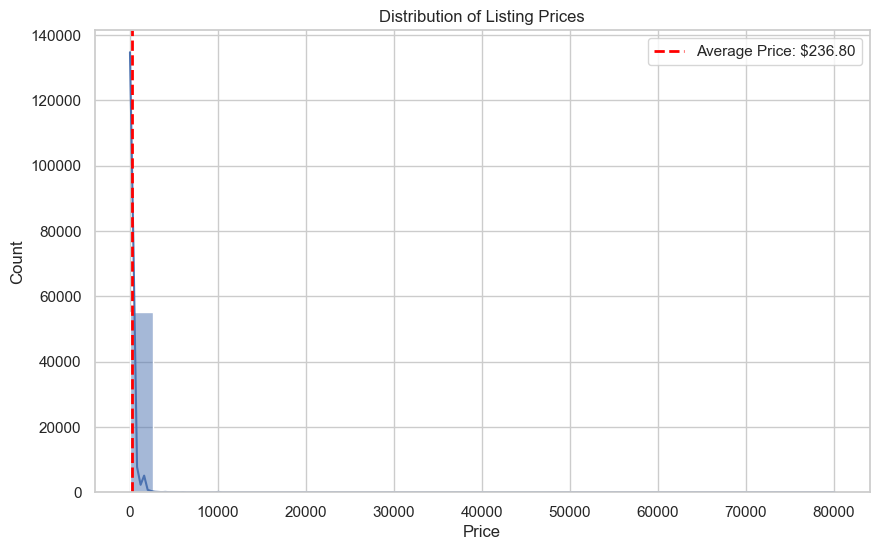

In [125]:
# Plot the average price
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.histplot(data['price'], bins=30, kde=True)
plt.axvline(average_price, color='red', linestyle='dashed', linewidth=2, label=f'Average Price: ${average_price:.2f}')
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.legend()
plt.show()

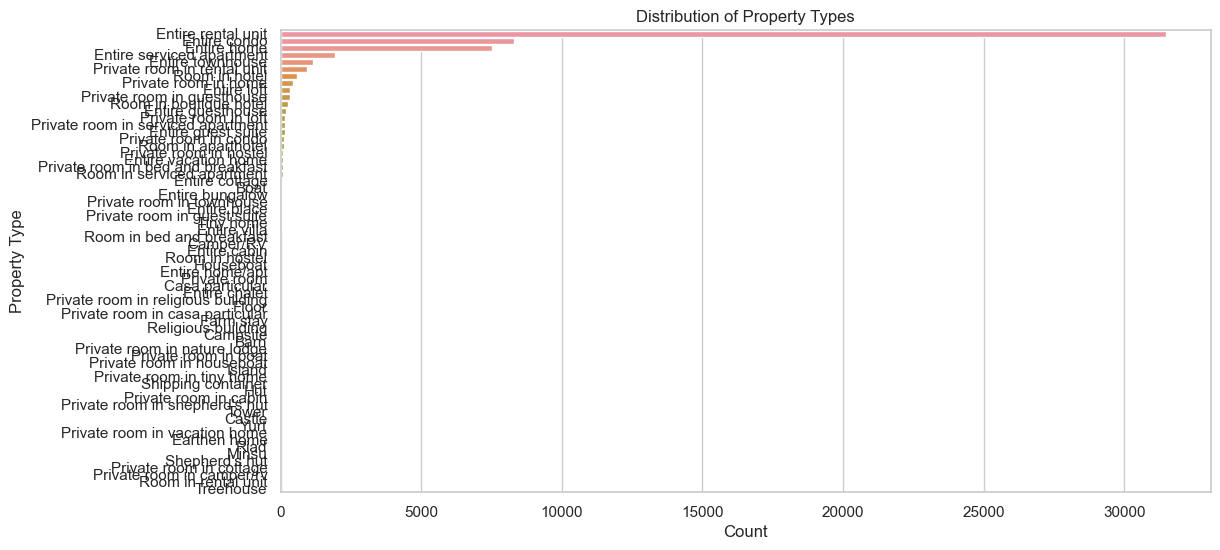

In [126]:
# Plot the distribution of property types
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='property_type', order=data['property_type'].value_counts().index)
plt.title('Distribution of Property Types')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.show()


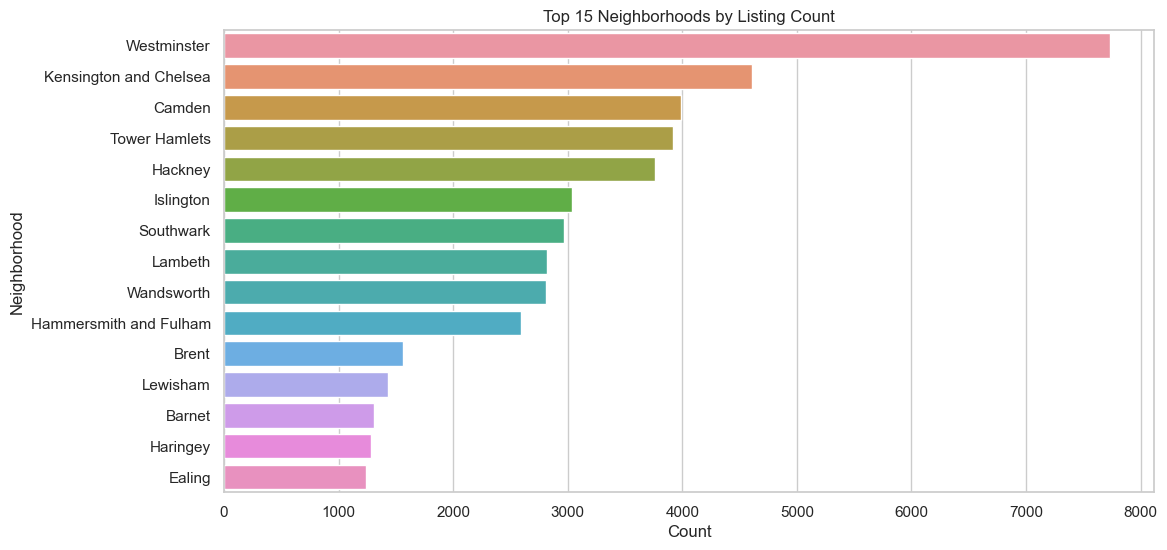

In [127]:
# Plot the distribution of neighborhoods
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='neighbourhood_cleansed', order=data['neighbourhood_cleansed'].value_counts().index[:15])
plt.title('Top 15 Neighborhoods by Listing Count')
plt.xlabel('Count')
plt.ylabel('Neighborhood')
plt.show()

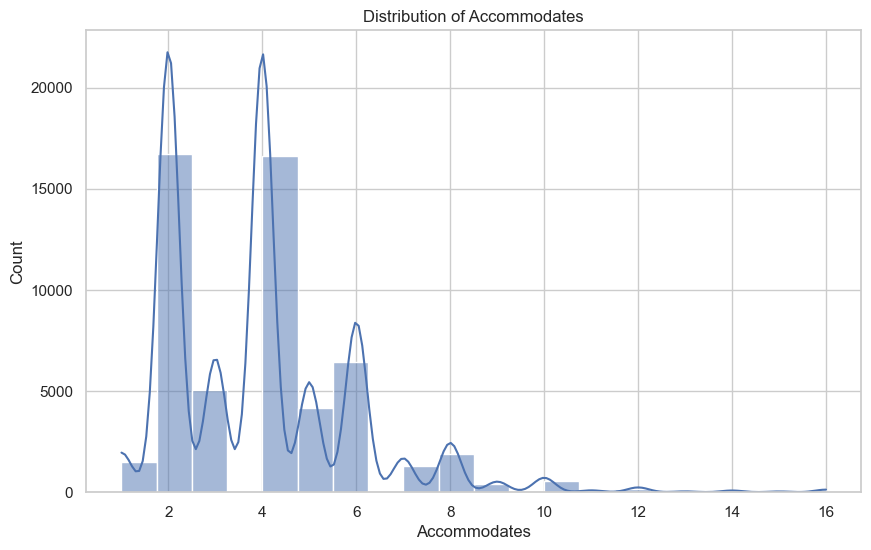

In [128]:
plt.figure(figsize=(10, 6))
sns.histplot(data['accommodates'], bins=20, kde=True)
plt.title('Distribution of Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Count')
plt.show()

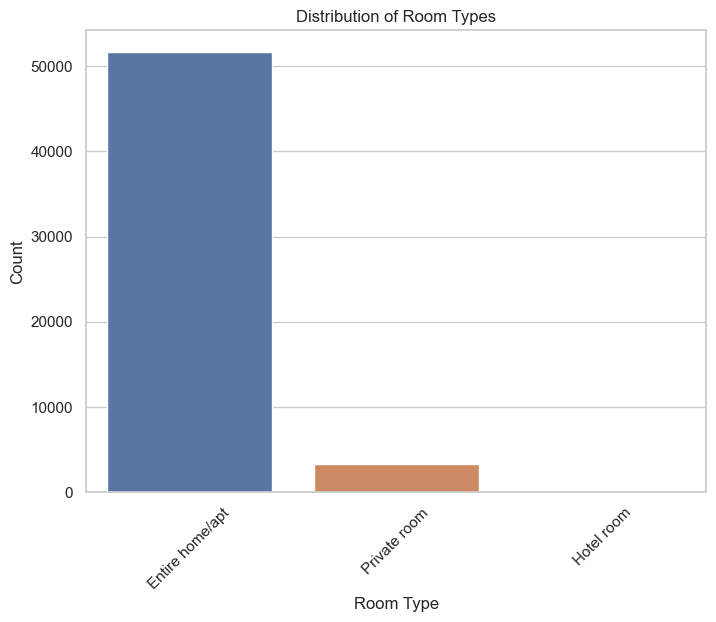

In [129]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='room_type')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


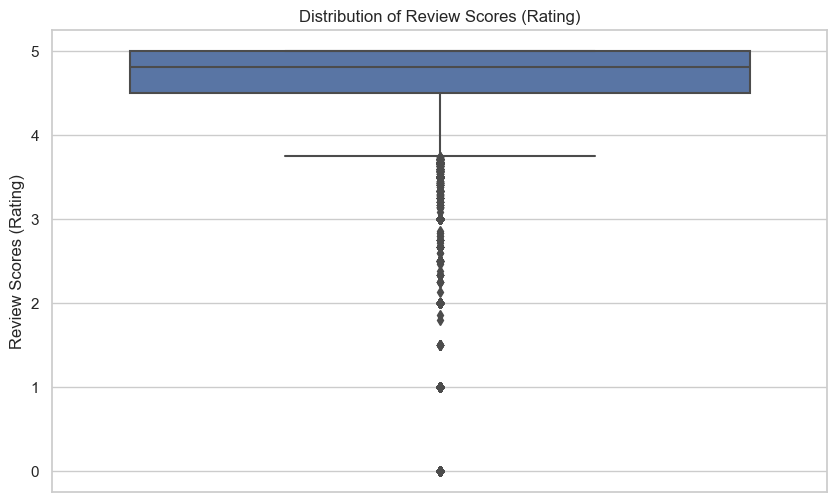

In [130]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, y='review_scores_rating')
plt.title('Distribution of Review Scores (Rating)')
plt.ylabel('Review Scores (Rating)')
plt.show()


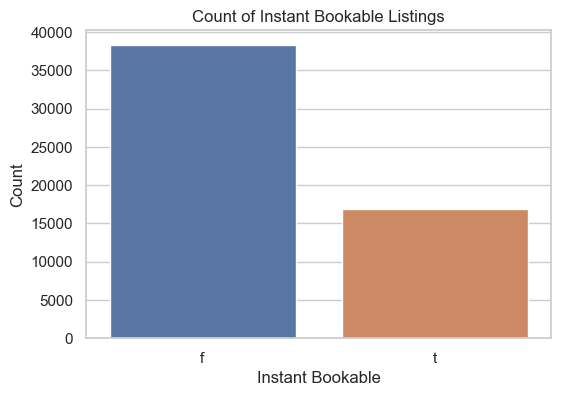

In [131]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='instant_bookable')
plt.title('Count of Instant Bookable Listings')
plt.xlabel('Instant Bookable')
plt.ylabel('Count')
plt.show()

id                                    float64
last_scraped                   datetime64[ns]
source                                 object
host_id                                 int64
host_name                              object
host_since                             object
host_location                          object
host_response_time                     object
host_response_rate                     object
host_acceptance_rate                   object
host_is_superhost                      object
host_neighbourhood                     object
host_listings_count                   float64
host_total_listings_count             float64
host_verifications                     object
host_has_profile_pic                   object
host_identity_verified                 object
neighbourhood_cleansed                 object
latitude                              float64
longitude                             float64
property_type                          object
room_type                         

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


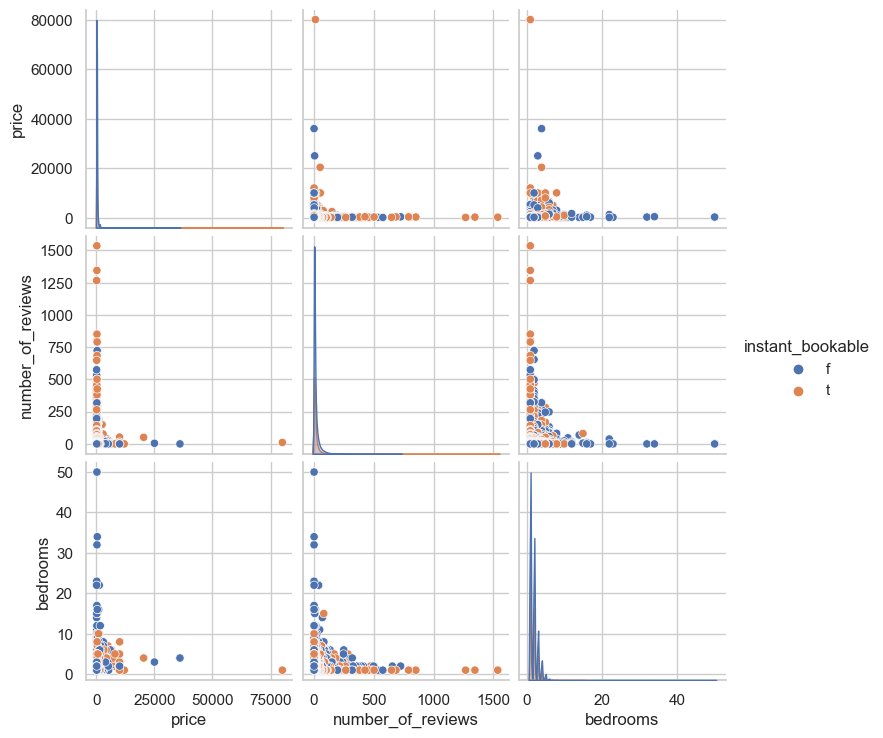

In [132]:
 # Check the data types of the variables
print(data.dtypes)

# Select appropriate numeric or datetime variables for the pairplot
# For example:
numeric_vars = ['price', 'number_of_reviews', 'bedrooms']
# datetime_vars = ['last_scraped']  # If you have datetime variables
#Create a pairplot using the selected variables
sns.pairplot(data=data, vars=numeric_vars, hue='instant_bookable')

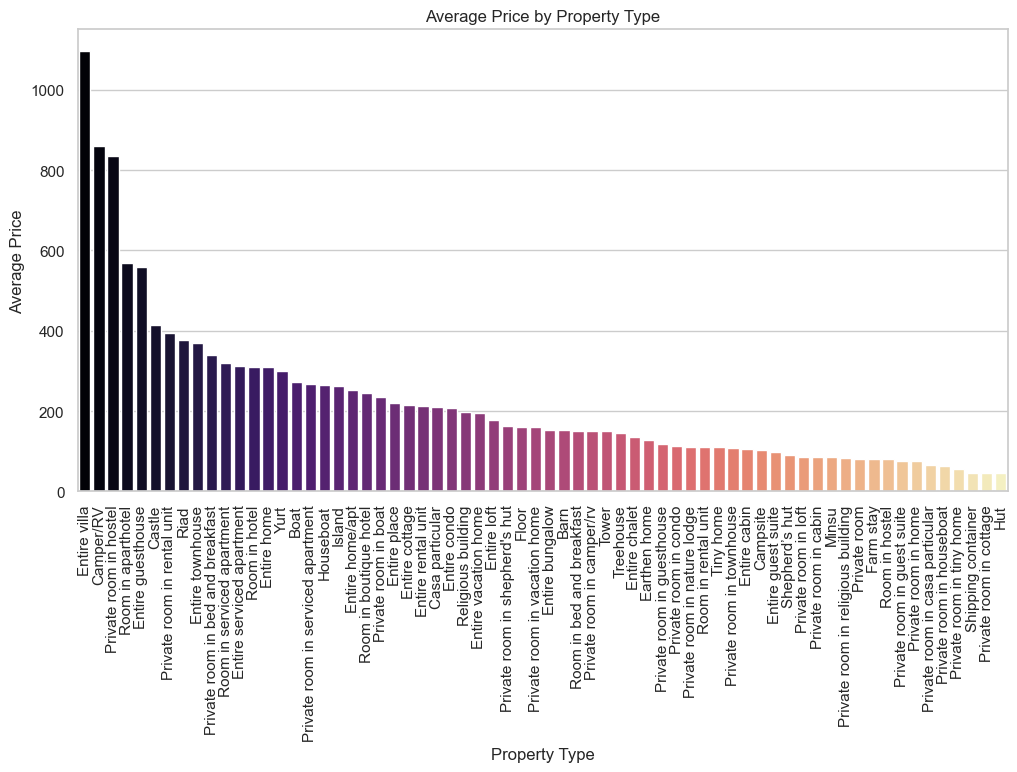

In [138]:

# Set the figure size
plt.figure(figsize=(12, 6))

# Calculate the average price by property type
avg_price_by_property = data.groupby('property_type')['price'].mean().sort_values(ascending=False)

# Create a bar plot for average price by property type
sns.barplot(x=avg_price_by_property.index, y=avg_price_by_property.values, palette='magma')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.title('Average Price by Property Type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


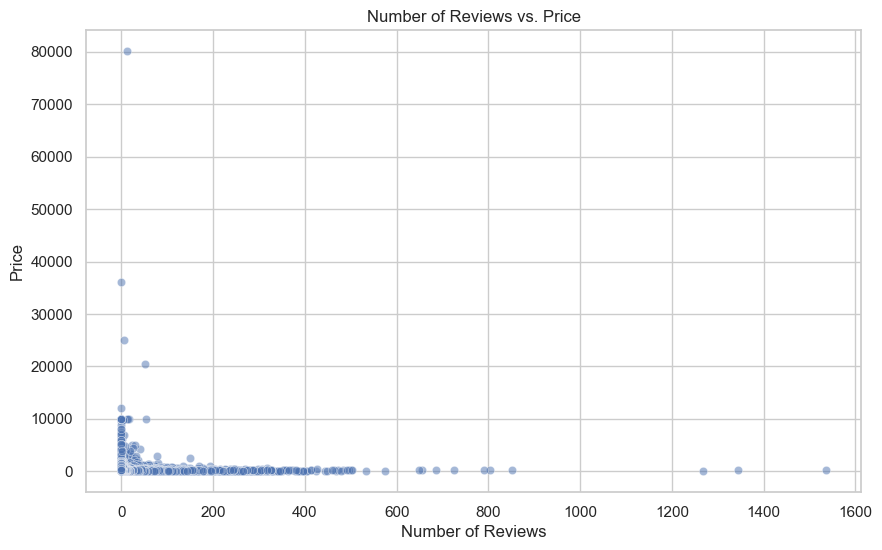

In [139]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot of number of reviews vs. price
sns.scatterplot(data=data, x='number_of_reviews', y='price', alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Number of Reviews vs. Price')
plt.show()


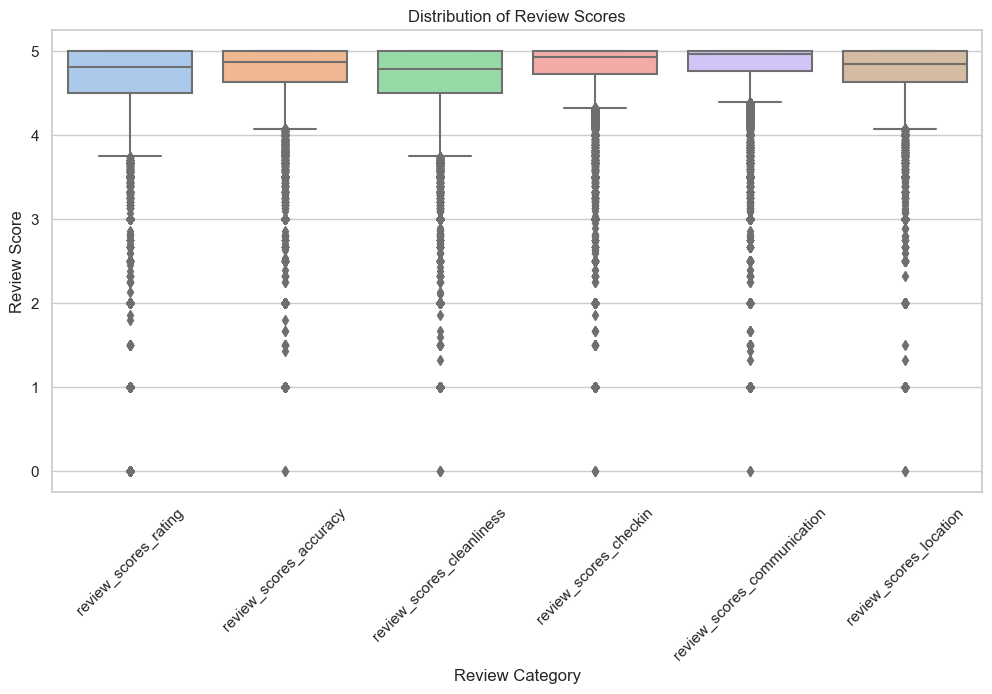

In [140]:

# Set the figure size
plt.figure(figsize=(12, 6))

# Create box plots for review scores
sns.boxplot(data=data[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                      'review_scores_checkin', 'review_scores_communication', 'review_scores_location']],
            palette='pastel')
plt.xlabel('Review Category')
plt.ylabel('Review Score')
plt.title('Distribution of Review Scores')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


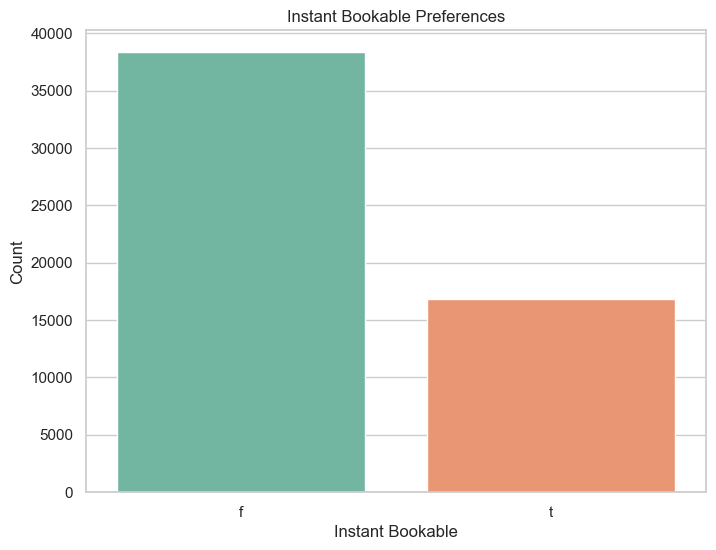

In [141]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a bar plot for instant bookable preferences
sns.countplot(data=data, x='instant_bookable', palette='Set2')
plt.xlabel('Instant Bookable')
plt.ylabel('Count')
plt.title('Instant Bookable Preferences')
plt.show()


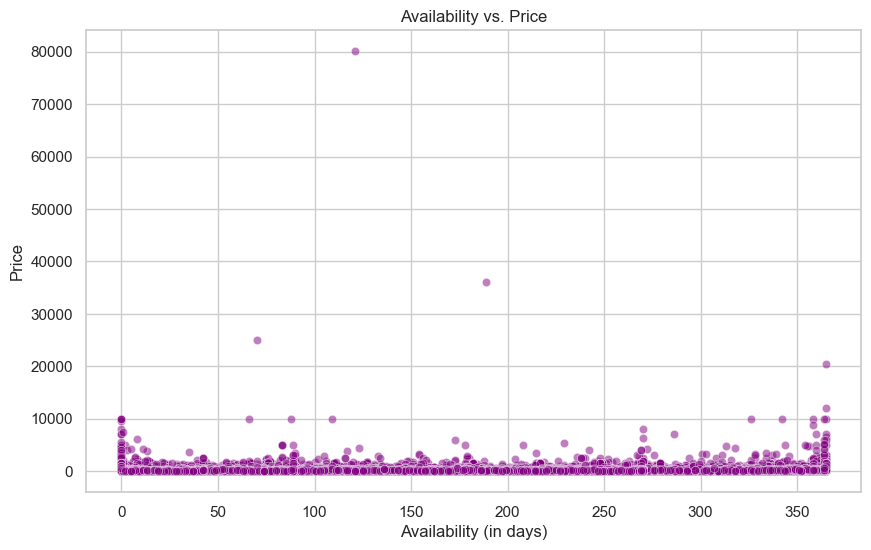

In [142]:

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot of availability vs. price
sns.scatterplot(data=data, x='availability_365', y='price', alpha=0.5, color='purple')
plt.xlabel('Availability (in days)')
plt.ylabel('Price')
plt.title('Availability vs. Price')
plt.show()


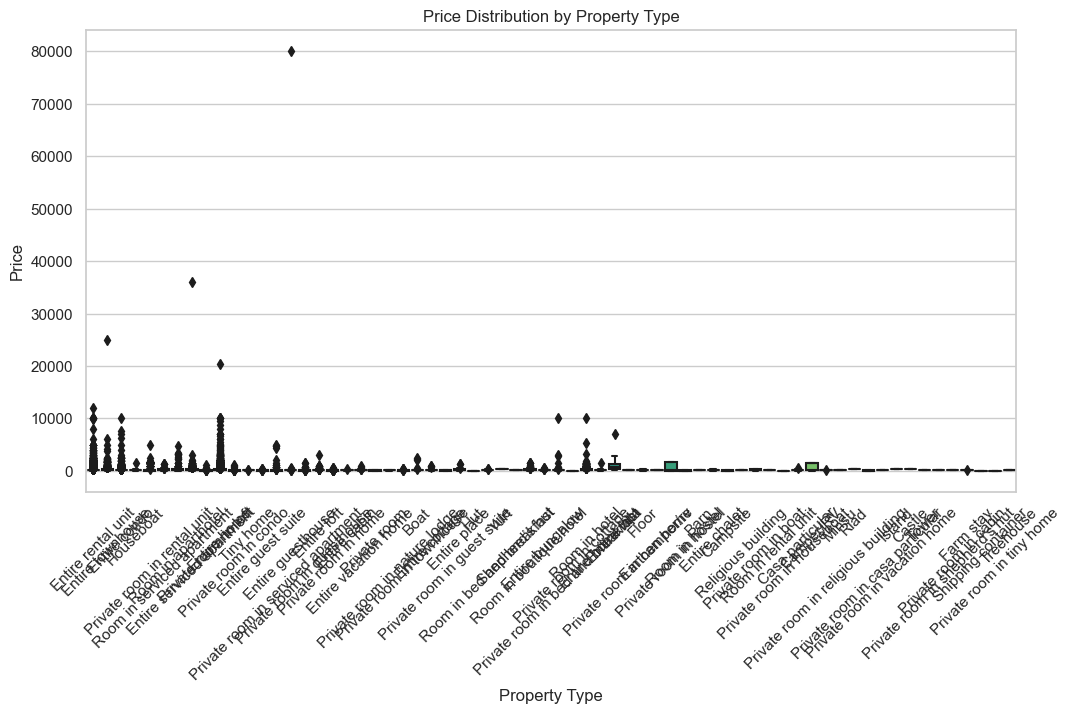

In [143]:


# Set the figure size
plt.figure(figsize=(12, 6))

# Create a box plot of price by property type
sns.boxplot(data=data, x='property_type', y='price', palette='viridis')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.title('Price Distribution by Property Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


<module 'matplotlib.pyplot' from 'C:\\Users\\lenovo\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

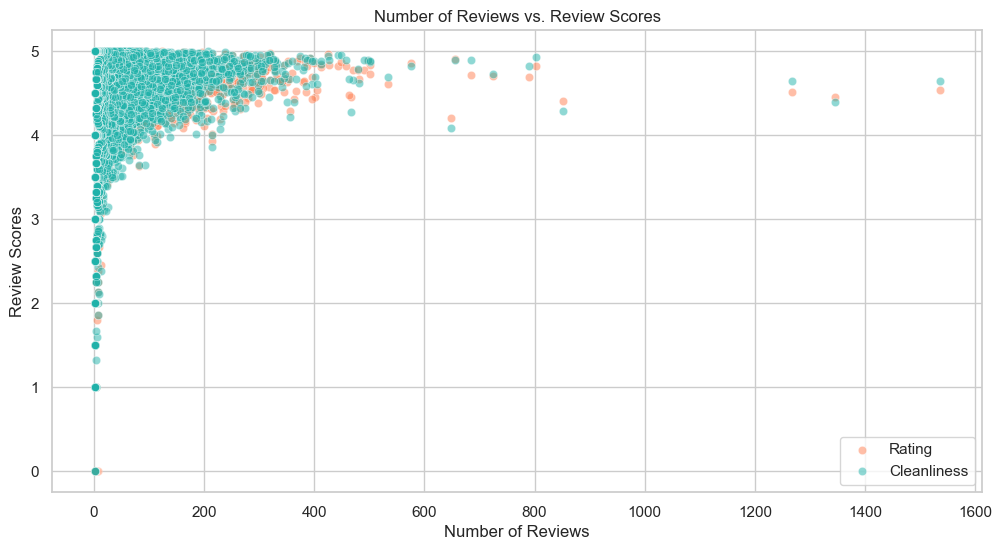

In [144]:

# Set the figure size
plt.figure(figsize=(12, 6))

# Create scatter plots for number of reviews vs. review scores
sns.scatterplot(data=data, x='number_of_reviews', y='review_scores_rating', alpha=0.5, color='coral', label='Rating')
sns.scatterplot(data=data, x='number_of_reviews', y='review_scores_cleanliness', alpha=0.5, color='lightseagreen', label='Cleanliness')
plt.xlabel('Number of Reviews')
plt.ylabel('Review Scores')
plt.title('Number of Reviews vs. Review Scores')
plt.legend()
plt


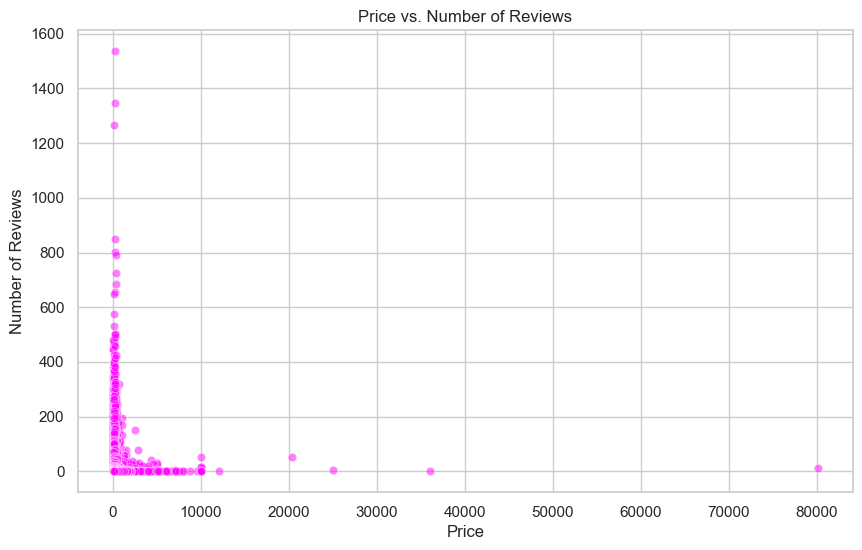

In [145]:

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot of price vs. number of reviews
sns.scatterplot(data=data, x='price', y='number_of_reviews', alpha=0.5, color='magenta')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Price vs. Number of Reviews')
plt.show()


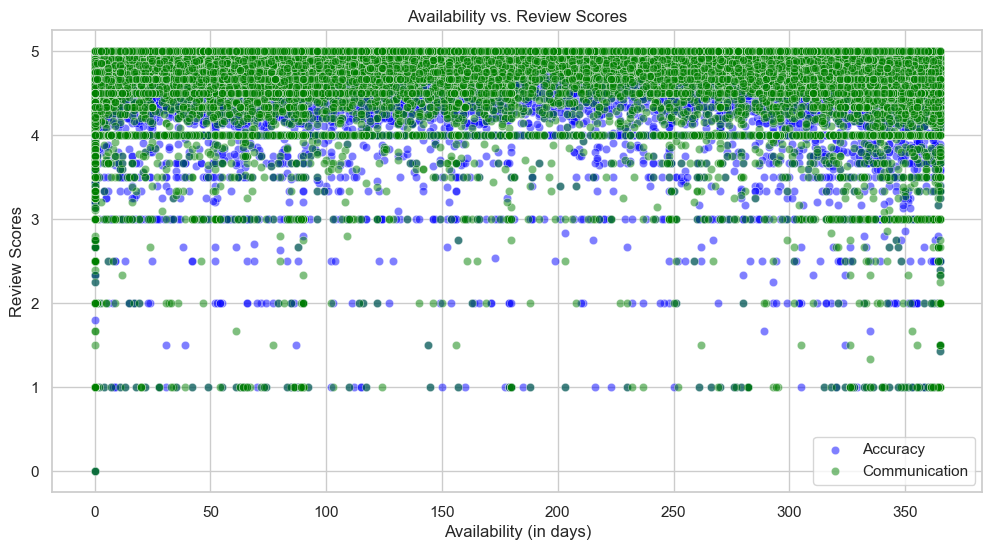

In [146]:

# Set the figure size
plt.figure(figsize=(12, 6))

# Create scatter plots for availability vs. review scores
sns.scatterplot(data=data, x='availability_365', y='review_scores_accuracy', alpha=0.5, color='blue', label='Accuracy')
sns.scatterplot(data=data, x='availability_365', y='review_scores_communication', alpha=0.5, color='green', label='Communication')
plt.xlabel('Availability (in days)')
plt.ylabel('Review Scores')
plt.title('Availability vs. Review Scores')
plt.legend()
plt.show()


Text(0, 0.5, 'Price')

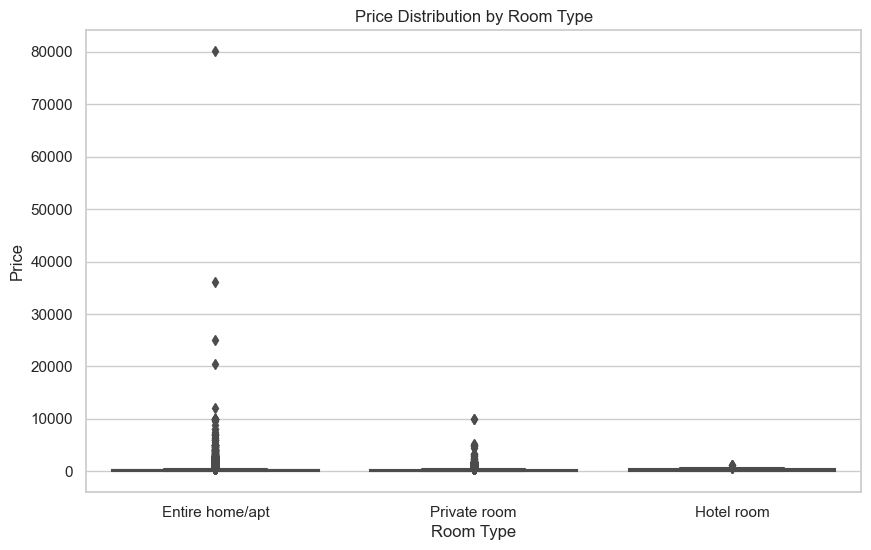

In [147]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='room_type', y='price')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')


Text(0, 0.5, 'Number of Reviews')

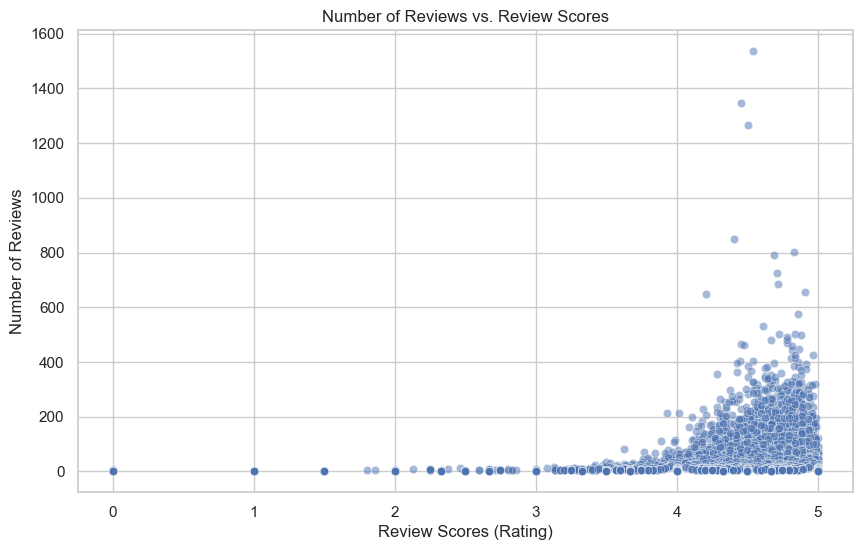

In [148]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='review_scores_rating', y='number_of_reviews', alpha=0.5)
plt.title('Number of Reviews vs. Review Scores')
plt.xlabel('Review Scores (Rating)')
plt.ylabel('Number of Reviews')


# **Corelation Analysis**

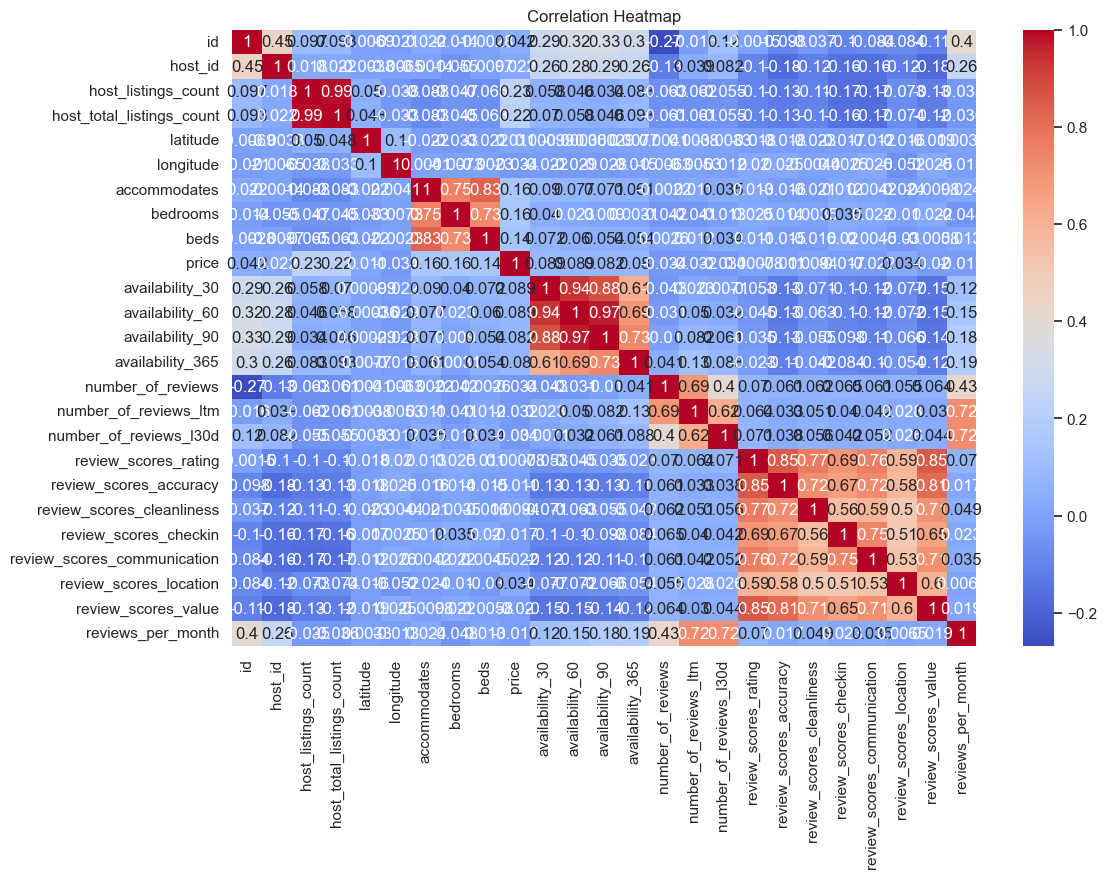

In [149]:
# Select only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [150]:
print(numeric_data.corr())

                                   id   host_id  host_listings_count  \
id                           1.000000  0.447865             0.096502   
host_id                      0.447865  1.000000             0.017526   
host_listings_count          0.096502  0.017526             1.000000   
host_total_listings_count    0.093128  0.021980             0.986444   
latitude                    -0.006935 -0.003771             0.050186   
longitude                   -0.021006 -0.006532            -0.038367   
accommodates                 0.021547 -0.001445            -0.088061   
bedrooms                    -0.014301 -0.054733            -0.047447   
beds                        -0.002824 -0.009685            -0.065339   
price                        0.042022  0.022380             0.227291   
availability_30              0.286116  0.263488             0.058132   
availability_60              0.318930  0.282272             0.046107   
availability_90              0.334694  0.289611             0.03

## **Geospatial Analysis**

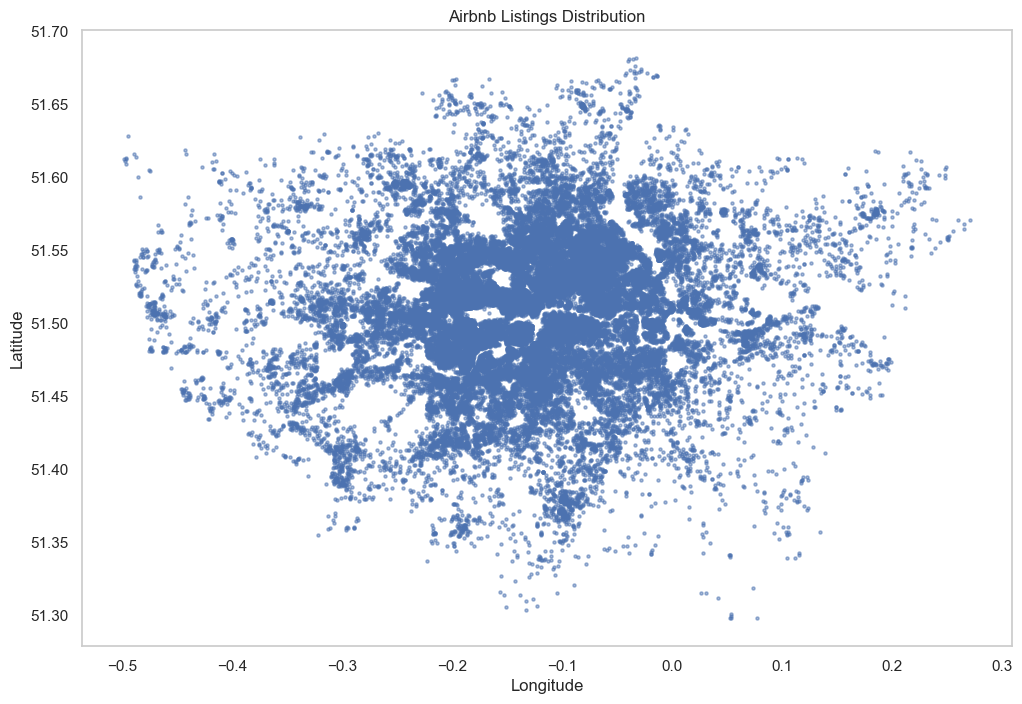

In [211]:

# Create a scatter plot of Airbnb listings using latitude and longitude
plt.figure(figsize=(12, 8))
plt.scatter(data['longitude'], data['latitude'], s=5, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Airbnb Listings Distribution')
plt.grid()
plt.show()


In [87]:
# Create a GeoDataFrame with a 'geometry' column
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
gdf = gpd.GeoDataFrame(data, geometry=geometry)

# Now, 'gdf' is a GeoDataFrame with your existing data and geometry information

# You can also specify the coordinate reference system (CRS) if needed
# For example, you can set the CRS to EPSG:4326 (WGS 84) for latitude and longitude
gdf.crs = 'EPSG:4326'

# Check the first few rows of the GeoDataFrame
print(gdf.head())


                   id           source  host_id              host_name  \
last_scraped                                                             
2023-09-06    93015.0      city scrape   499704                  Sarah   
2023-09-06    15400.0      city scrape    60302               Philippa   
2023-09-06    17402.0      city scrape    67564                    Liz   
2023-09-06    93783.0      city scrape   502496  Darshi Rowan And Tara   
2023-09-07    24328.0  previous scrape    41759                    Joe   

             host_since                                      host_location  \
last_scraped                                                                 
2023-09-06    4/11/2011                             London, United Kingdom   
2023-09-06    12/5/2009  Royal Borough of Kensington and Chelsea, Unite...   
2023-09-06     1/4/2010                             London, United Kingdom   
2023-09-06    4/12/2011                             London, United Kingdom   
2023-09-07   

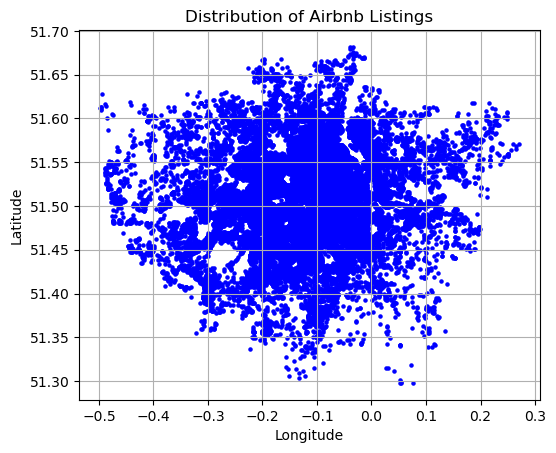

In [88]:
# Create a simple map
gdf.plot(marker='o', color='blue', markersize=5)
plt.title('Distribution of Airbnb Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Show the map
plt.show()


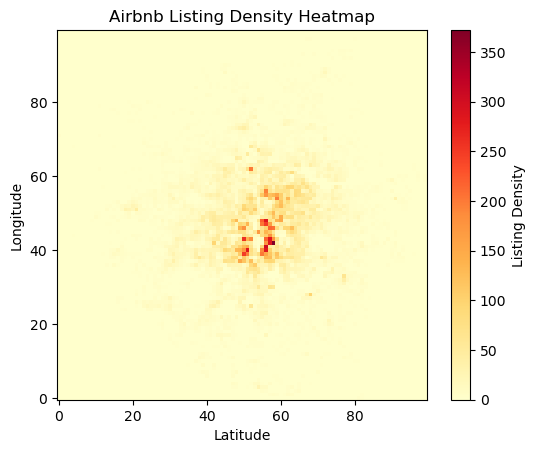

In [89]:
# Create a 2D histogram (heatmap) of the spatial data
heatmap, xedges, yedges = np.histogram2d(gdf['latitude'], gdf['longitude'], bins=100)

# Plot the heatmap
plt.imshow(heatmap.T, origin='lower', cmap='YlOrRd')
plt.colorbar(label='Listing Density')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Airbnb Listing Density Heatmap')
plt.show()

In [90]:
import folium

# Create an interactive map
m = folium.Map(location=[51.5074, -0.1278], zoom_start=10)  # London coordinates

# Add Airbnb listings to the map
for idx, row in gdf.iterrows():
    popup = f"Host: {row['host_name']}<br>Price: {row['price']} GBP"
    folium.Marker([row['latitude'], row['longitude']], popup=popup).add_to(m)

# Save the map as an HTML file
m.save("airbnb_listings_map.html")


## **Data Model**

In [157]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset 
data = pd.read_csv('data.csv')

# Select relevant features (independent variables) and the target variable (price)
features = ['bedrooms',  'accommodates' ]  # Add relevant features
X = data[features]
y = data['price']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 146.0932022590799
Mean Squared Error: 789483.2163594682
R-squared: 0.008395757190923336


### **Time Series Model**

In [161]:

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error


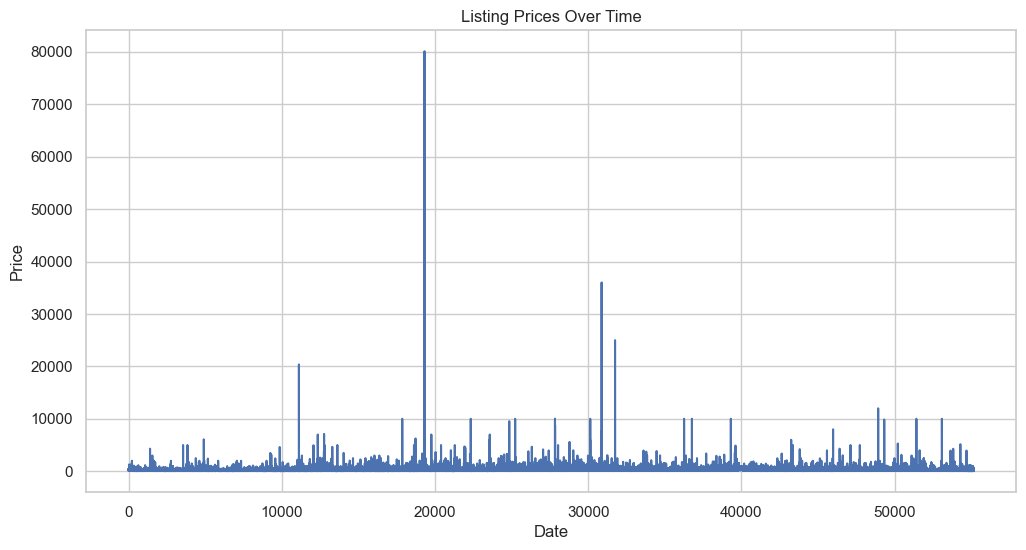

In [163]:
plt.figure(figsize=(12, 6))
plt.plot(data['price'])
plt.title('Listing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [164]:
result = adfuller(data['price'])
if result[1] <= 0.05:
    print('Time series is stationary.')
else:
    print('Time series is not stationary. Differencing may be needed.')


Time series is stationary.


In [166]:
train_size = int(0.8 * len(data))
train, test = data['price'][:train_size], data['price'][train_size:]


In [167]:
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()


In [169]:
forecast = model_fit.forecast(steps=len(test))


In [170]:
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 113317.59696983454


## **Data insight**

### **Data Cleaning and Preprocessing:**

Data cleaning and preprocessing are crucial initial steps in the exploratory data analysis (EDA) of Airbnb listings. This process involves addressing missing values, data type conversion, and the removal of duplicates to enhance data quality and suitability for analysis and modeling. Missing values were identified in various columns, including host-related information, and were either filled with relevant values or dropped, depending on the context. The 'price' column underwent a transformation to ensure compatibility with numerical analysis. Duplicate rows were removed to maintain data integrity. Additionally, a column with a significant number of missing values, 'neighbourhood,' was removed as it wouldn't contribute significantly to the analysis. These preprocessing steps are fundamental to ensuring the reliability of data and are a prerequisite for successful model development and insightful data analysis


### **Data Visualization:**

In the process of visualizing the Airbnb listings data, several key insights were revealed:

- The average price for listings is approximately '236 dollar.', providing an initial understanding of the pricing landscape.
- 'Entire rental units' are the most prevalent property type, with over 3,000 listings, indicating a strong presence in the dataset.
- 'Westminster' leads in the distribution of neighborhoods with over 7,000 listings, closely followed by 'Kensington and Chelsea' with more than 4,000 listings, highlighting their popularity among Airbnb hosts.
- Analyzing the distribution of accommodation capacity ('accommodates') and room types offers valuable insights into guest preferences and host offerings.
- The average price of 'Entire villa' properties exceeds 1,000 dollar, making them the most expensive property type.

These visualizations provide valuable context for understanding the Airbnb listings dataset, including property types, neighborhood popularity, and pricing dynamics, which can inform further analyses and decision-making in the domain of short-term rentals.


### **Correlation Analysis**
The correlation matrix provides valuable insights into the relationships between various attributes in the dataset. One of the notable observations is the positive correlation between the number of reviews per month and the number of reviews, indicating that properties with more reviews tend to have a higher monthly review rate. Additionally, there's a significant positive correlation between the number of reviews and listing availability, suggesting that highly reviewed listings might have more availability, likely due to increased demand. On the other hand, attributes like longitude and latitude show weak correlations with most variables, highlighting their limited impact on the dataset's other features. These correlations can serve as a foundation for further analysis and modeling, offering insights into potential cause-and-effect relationships within the Airbnb listing dataset.

### **Geospatial Analysis**

Geospatial analysis is a valuable approach for understanding the distribution and density of Airbnb listings in London. These visualizations help users quickly identify popular areas with a high density of listings, making them ideal for potential visitors. They also offer insights for property owners and investors looking to make data-driven decisions about where to offer their listings. Geospatial analysis can be a crucial tool for understanding the Airbnb market and making informed choices related to property management and investment.

### **Regression Model Evaluation**

The linear regression model was employed to predict property prices based on features like the number of bedrooms and accommodation capacity. However, the model's performance appears to be limited, as indicated by the evaluation metrics. The mean absolute error (MAE) of approximately 146.09 suggests that, on average, the model's predictions are off by this amount in the price prediction. The mean squared error (MSE) of 789,483.22 reveals that there is substantial variance between predicted and actual prices, resulting in larger errors. The R-squared value of only 0.0084 indicates that the model explains a very small proportion of the variance in the data, signifying a weak fit. These results underscore the need for further model refinement and potentially the inclusion of additional relevant features to enhance predictive accuracy.

### **Time Series Analysis**

In this time series analysis, we examined the historical trends in Airbnb listing prices over time. The plot of listing prices revealed fluctuations and potential patterns in the data. To assess the stationarity of the time series, an Augmented Dickey-Fuller test was conducted, and it indicated that differencing might be necessary to achieve stationarity.

Subsequently, we applied an ARIMA (AutoRegressive Integrated Moving Average) model to the training data to capture and forecast the price trends. The model's performance was evaluated using the Mean Squared Error (MSE), resulting in an MSE of approximately 113,317.60. This analysis provides valuable insights into the temporal dynamics of Airbnb listing prices, enabling hosts and investors to better understand and predict future pricing trends. Further model refinement and exploration of seasonality could enhance the accuracy of price predictions.